# Importing the libraries 

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
pd.options.display.max_columns = None

# OneHotEncoding

In [3]:
data = pd.read_csv('Dataset/passengers_satisfaction.csv')
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
1,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
2,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
3,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
4,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied


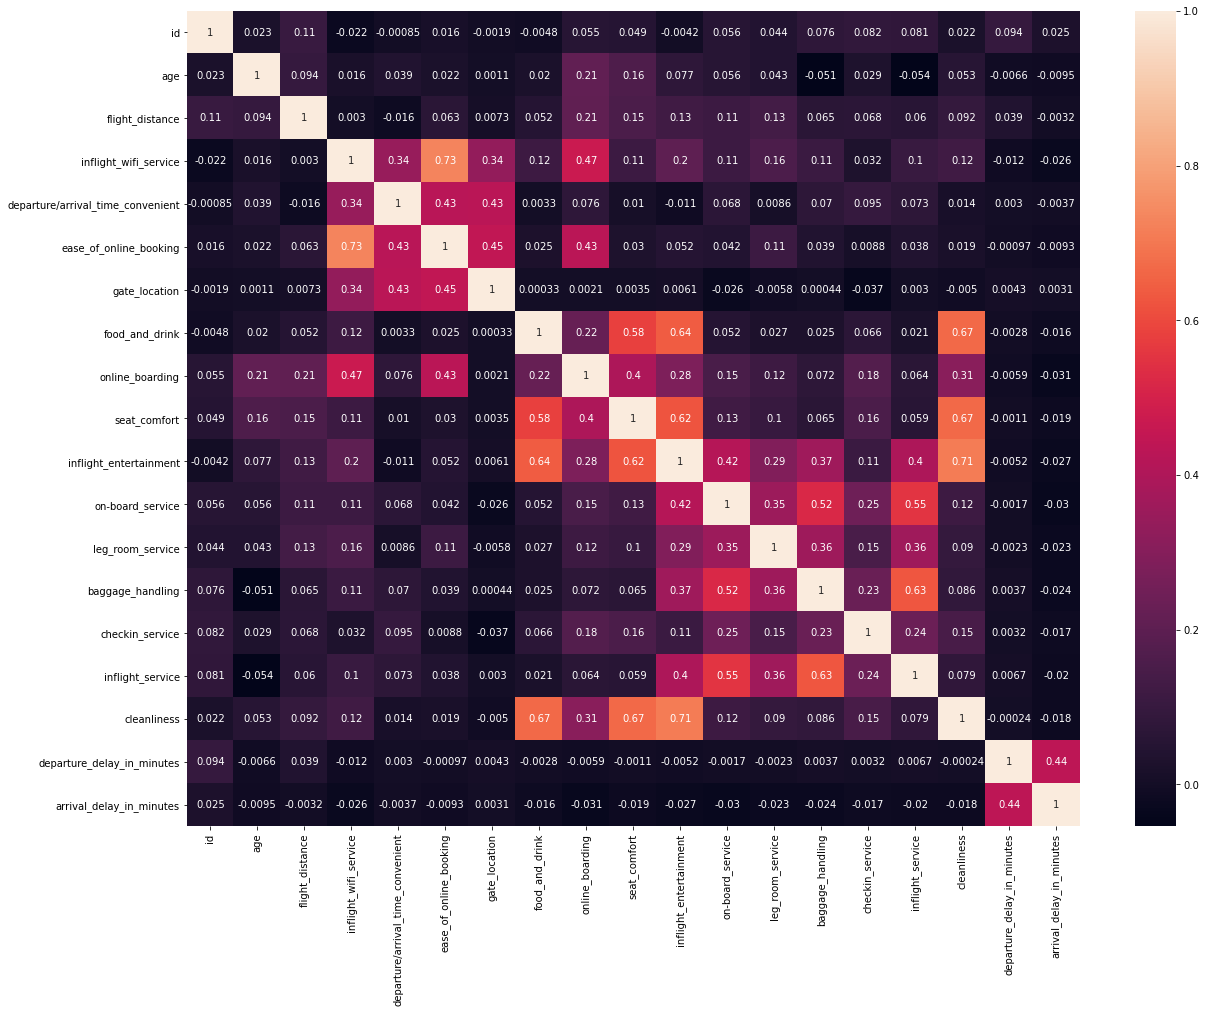

In [4]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75119 entries, 0 to 75118
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 75119 non-null  int64  
 1   gender                             75119 non-null  object 
 2   customer_type                      75119 non-null  object 
 3   age                                75119 non-null  int64  
 4   type_of_travel                     75119 non-null  object 
 5   class                              75119 non-null  object 
 6   flight_distance                    75119 non-null  int64  
 7   inflight_wifi_service              75119 non-null  int64  
 8   departure/arrival_time_convenient  75119 non-null  int64  
 9   ease_of_online_booking             75119 non-null  int64  
 10  gate_location                      75119 non-null  int64  
 11  food_and_drink                     75119 non-null  int

In [6]:
y = data['satisfaction']
X = data.drop(['satisfaction'], axis=1)

In [7]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

In [8]:
X_cat

,gender,customer_type,type_of_travel,class,satisfaction
0,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
...,...,...,...,...,...
75114,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
75115,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
75116,Male,Loyal Customer,Business travel,Business,satisfied
75117,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [9]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [10]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [11]:
X = np.concatenate([X_num, encoded], axis=1)
X

array([[5.04700e+03, 2.50000e+01, 2.35000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.10028e+05, 2.60000e+01, 1.14200e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.40260e+04, 2.50000e+01, 5.62000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [7.30970e+04, 4.90000e+01, 2.34700e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.41730e+04, 2.20000e+01, 1.00000e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.25670e+04, 2.70000e+01, 1.72300e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

# Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, y_train)

/Users/Iyekrek/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [14]:
classification.score(X_test, y_test)

0.9771033013844516

In [15]:
predictions = classification.predict(X_test)
predictions

array(['satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

In [16]:
confusion_matrix(y_test, predictions) 

array([[8059,  134],
       [ 210, 6621]])

In [17]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.53640841, 0.00891906],
       [0.01397764, 0.44069489]])

<AxesSubplot:>

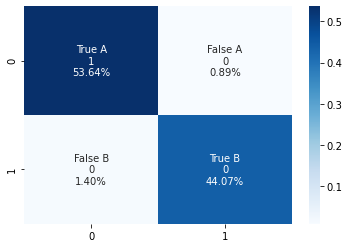

In [18]:
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Random Forest

Grid Search

In [25]:
clf = RandomForestClassifier(random_state=0, max_depth=1, max_features='sqrt', min_samples_leaf=5, min_samples_split=5, n_estimators=250)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9727768903088392


In [26]:
clf = RandomForestClassifier(random_state=0, max_depth=2, max_features='sqrt', min_samples_leaf=5, min_samples_split=5, n_estimators=250)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9935436634717785


In [30]:
clf = RandomForestClassifier(random_state=0, max_depth=3, max_features='sqrt', min_samples_leaf=5, min_samples_split=5, n_estimators=250)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


In [32]:
clf = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', min_samples_leaf=5, min_samples_split=5, n_estimators=250)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


In [28]:
clf = RandomForestClassifier(random_state=0, max_depth=50, max_features='sqrt', min_samples_leaf=5, min_samples_split=5, n_estimators=250)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

1.0


In [18]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    }
clf = RandomForestClassifier(random_state=100)

grid_search = RandomizedSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}